In [10]:
#saveRDS(sce_scran, "checkpoint.1.rds")
# Nicly reduced the batch effect on the data
sce <- readRDS("checkpoint.1.rds")
library(SC3)
library(scater)

In [11]:
# Replace combat data with logcounts
logcounts(sce) <- assay(sce, "combat")

In [12]:
rowData(sce)$feature_symbol = rownames(sce)       # must connect this slot for SC3
sce <- sc3_estimate_k(sce)
message("Best guess on the number of clusters: ", metadata(sce)$sc3$k_estimation)

Estimating k...
Best guess on the number of clusters: 52


In [13]:
krange <- c(2,3,4,5,6,8,9,10,15,20,25,30,52)
sce <- sc3(sce, ks = krange, biology = TRUE)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...
Calculating biology...


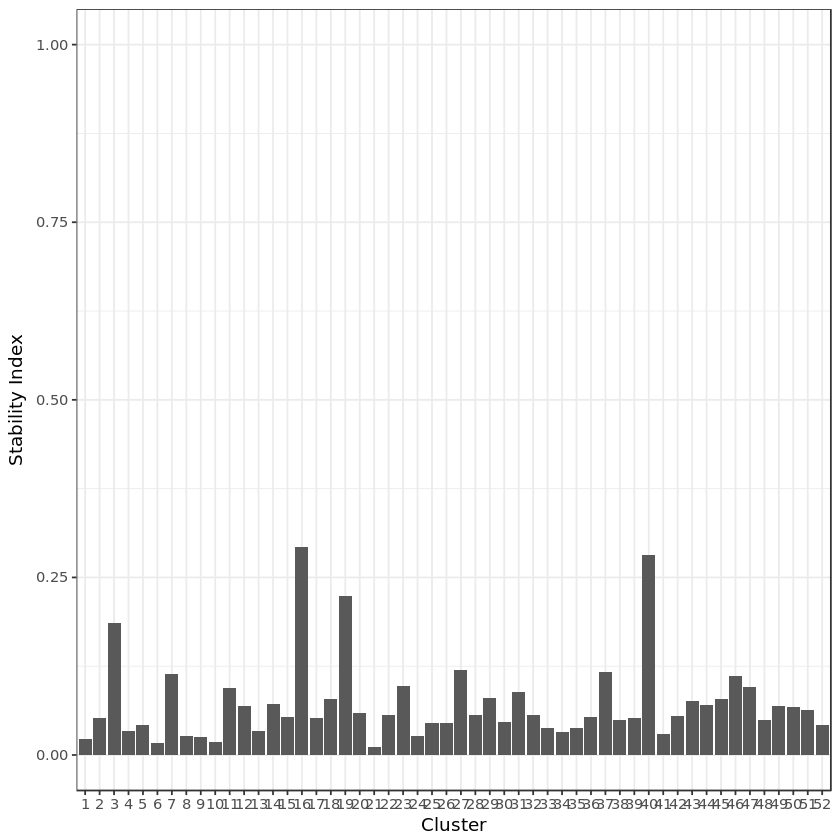

In [16]:
sc3_plot_cluster_stability(sce, tail(krange, n=1))

Plots
k = 2


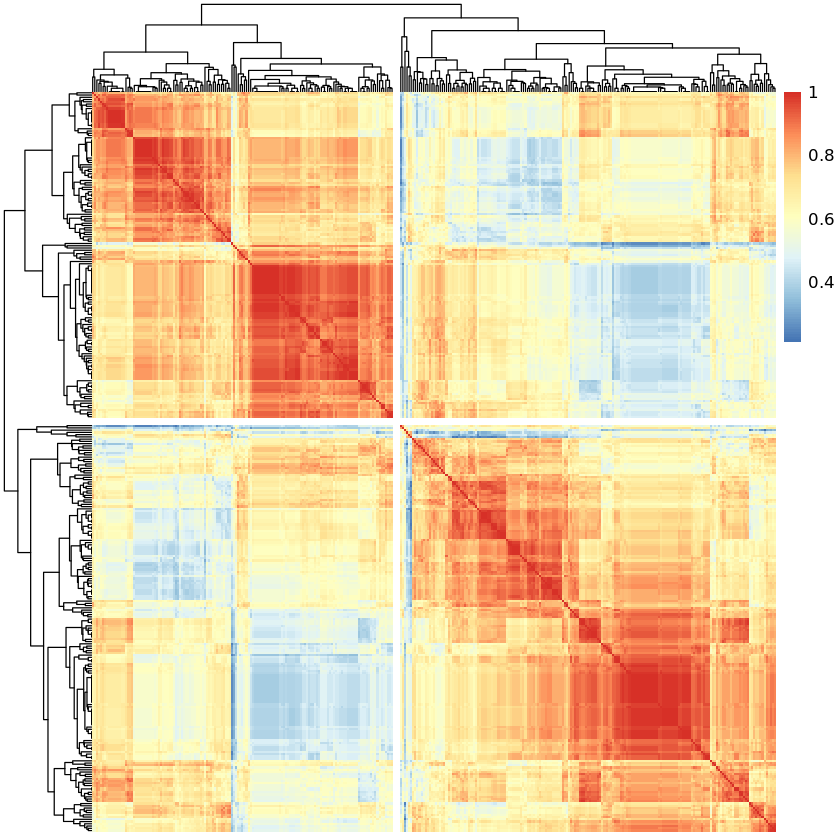

k = 3


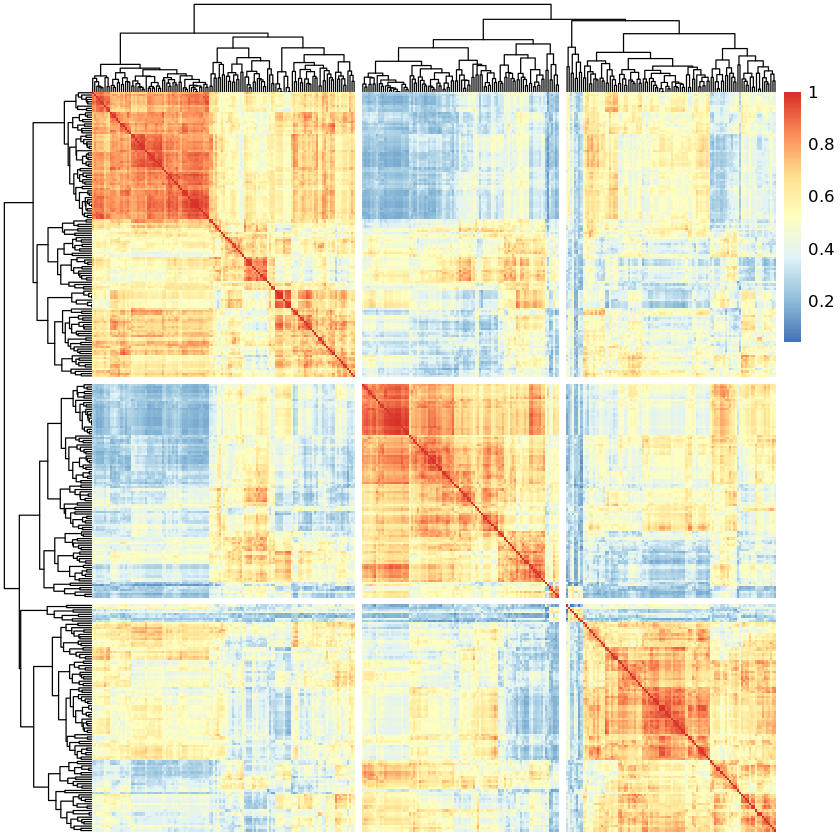

k = 4


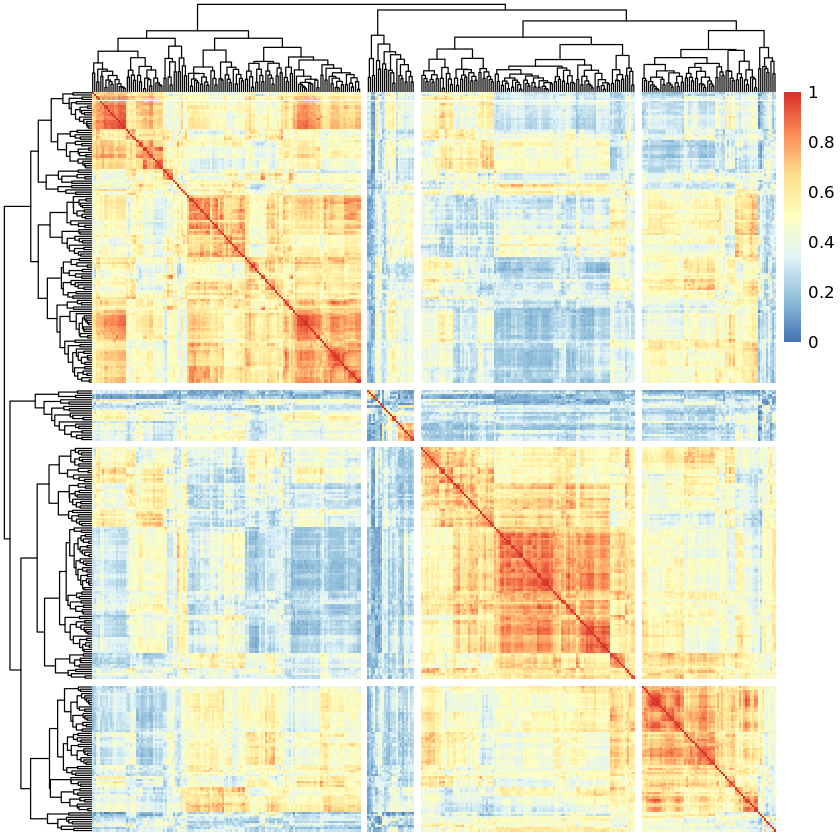

k = 5


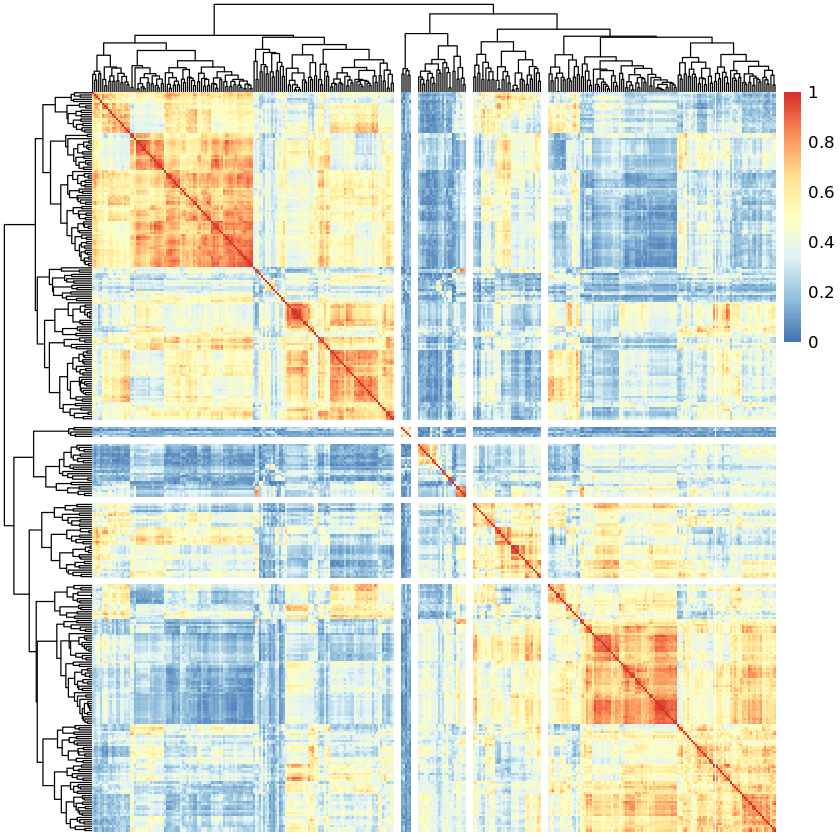

k = 6


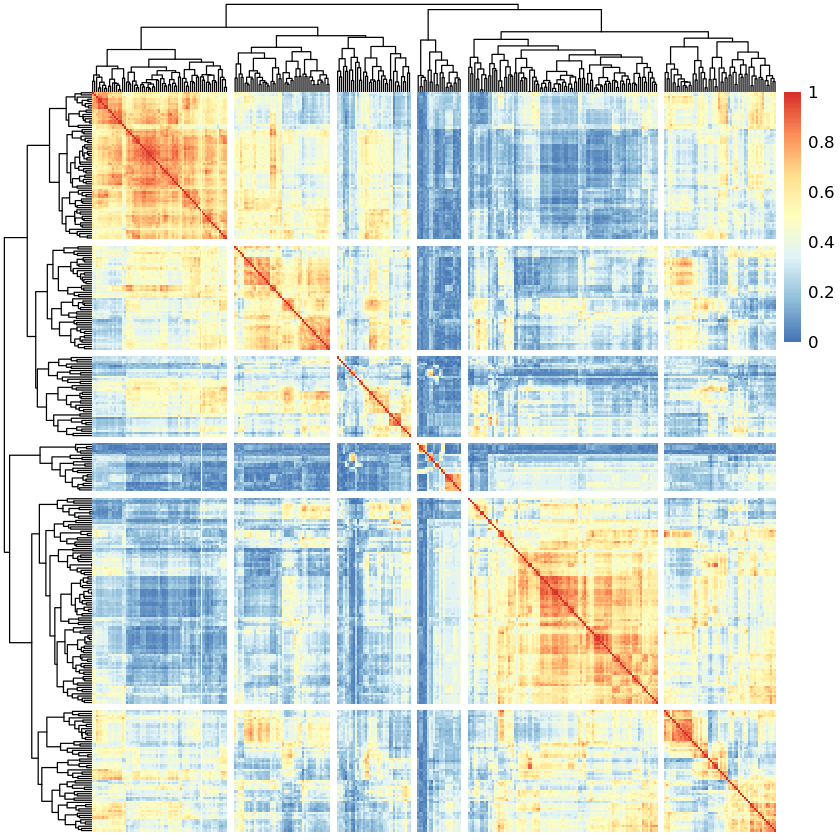

k = 8


k = 9


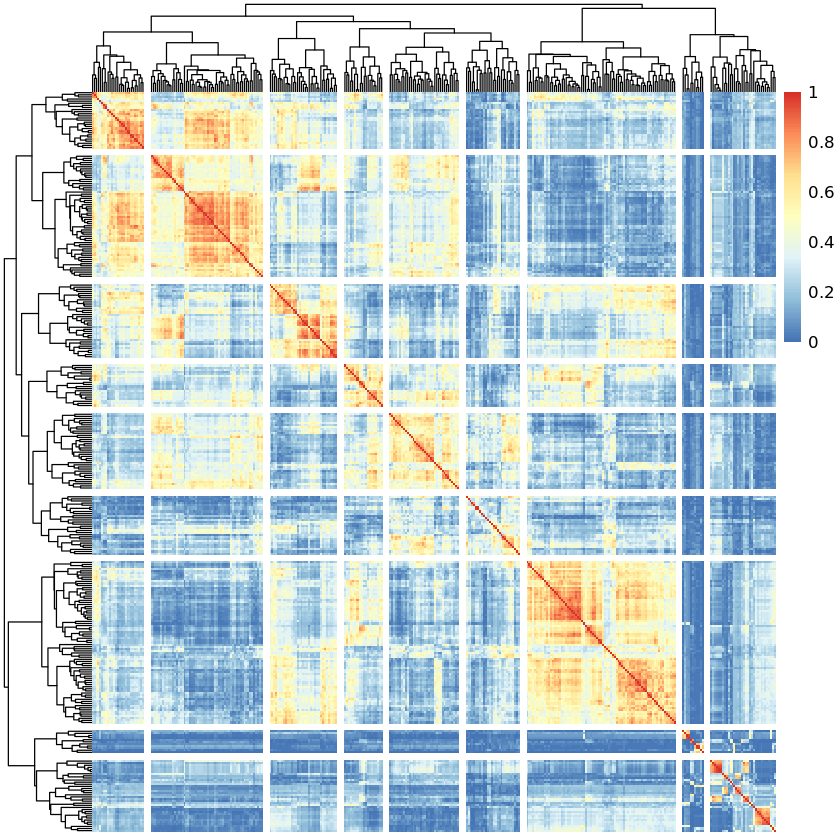

k = 10


k = 15


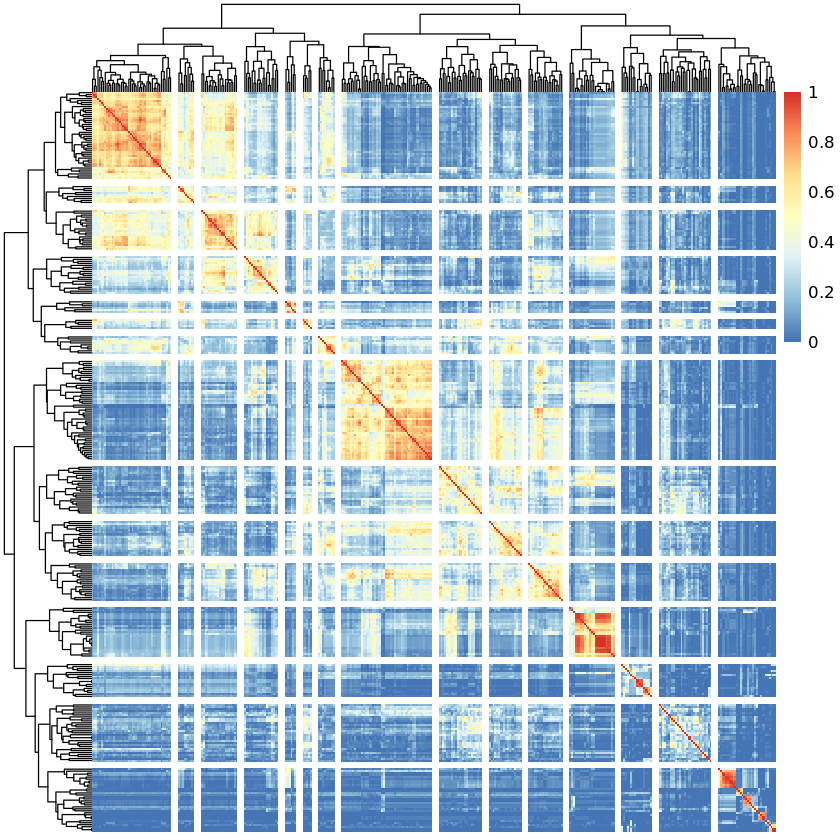

k = 20


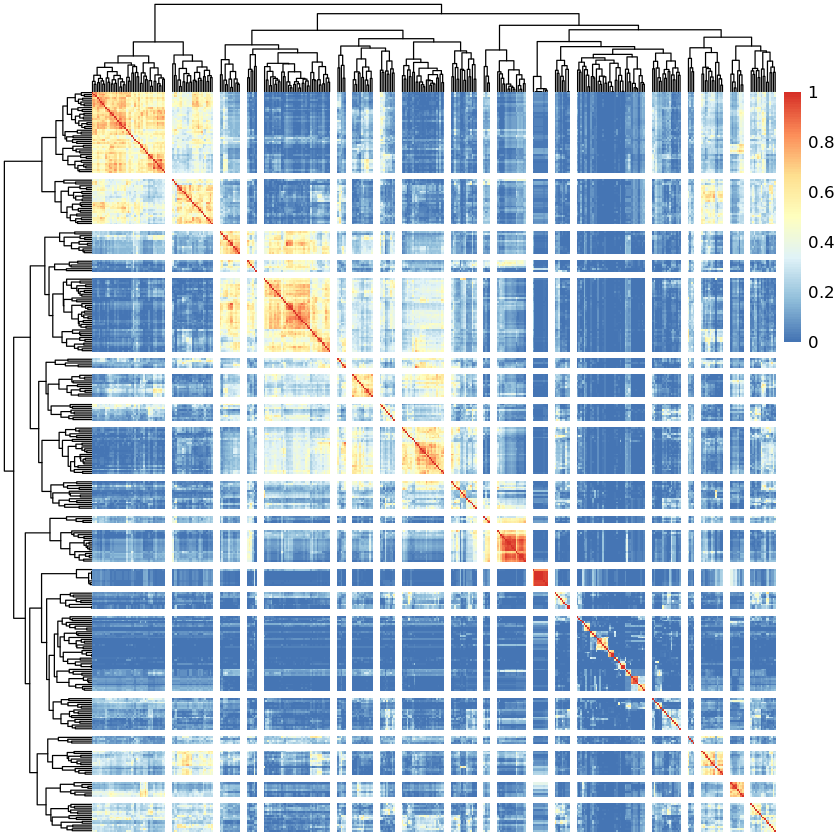

k = 25


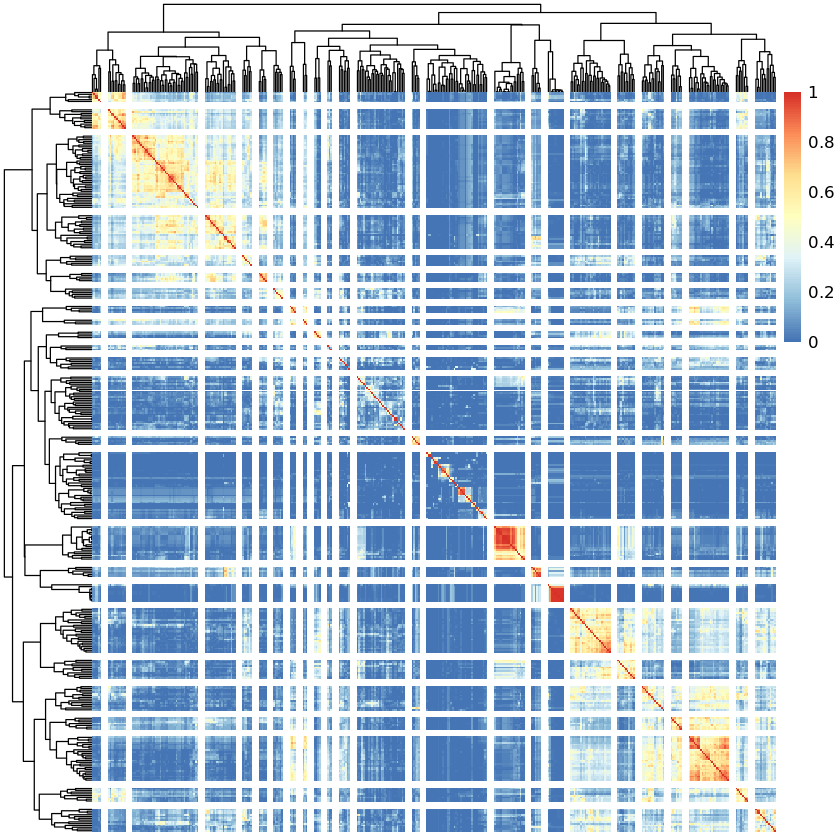

k = 30


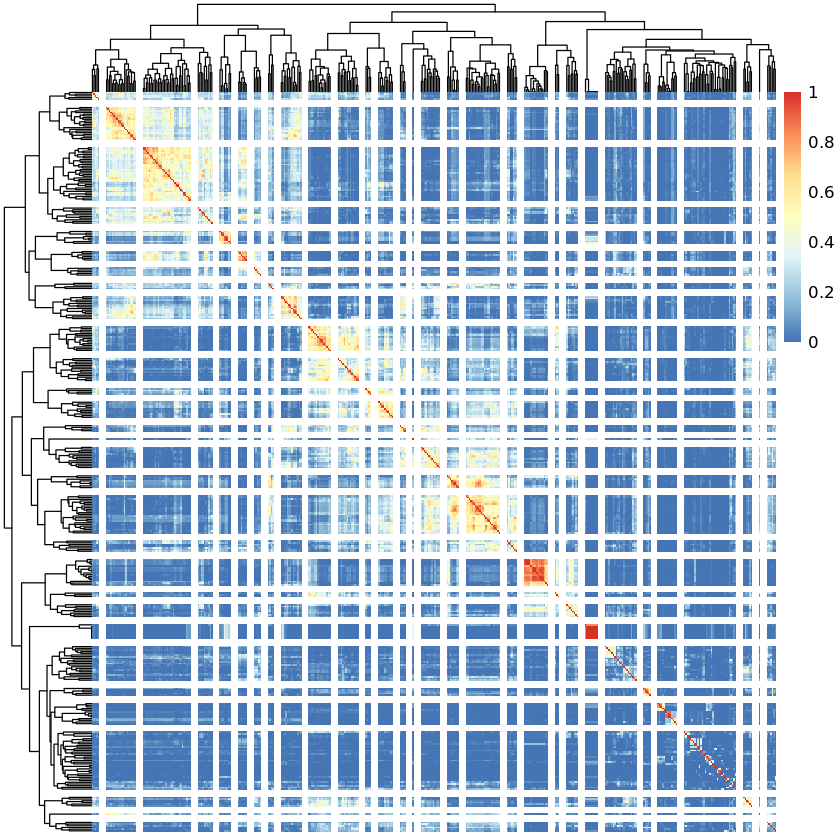

k = 52


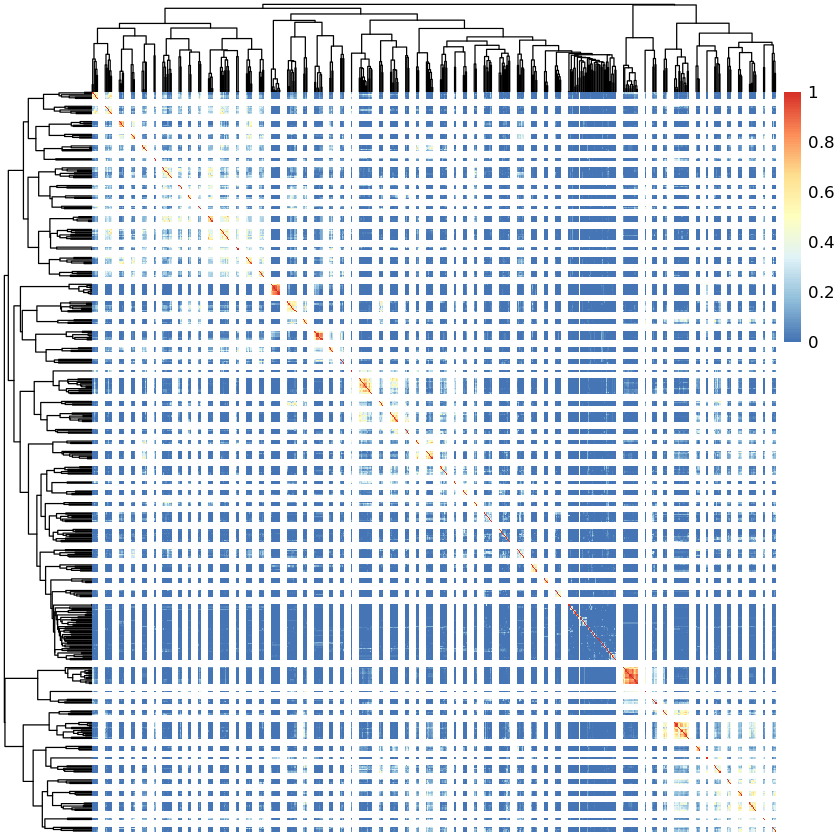

In [17]:
library(gridExtra)

#multiplot(    # doesn't work for sc3

cat("Plots\n")
for (k in krange){   
    sc3_plot_consensus(sce, k)
    cat(sprintf("k = %.0f\n", k))
}

k = 2


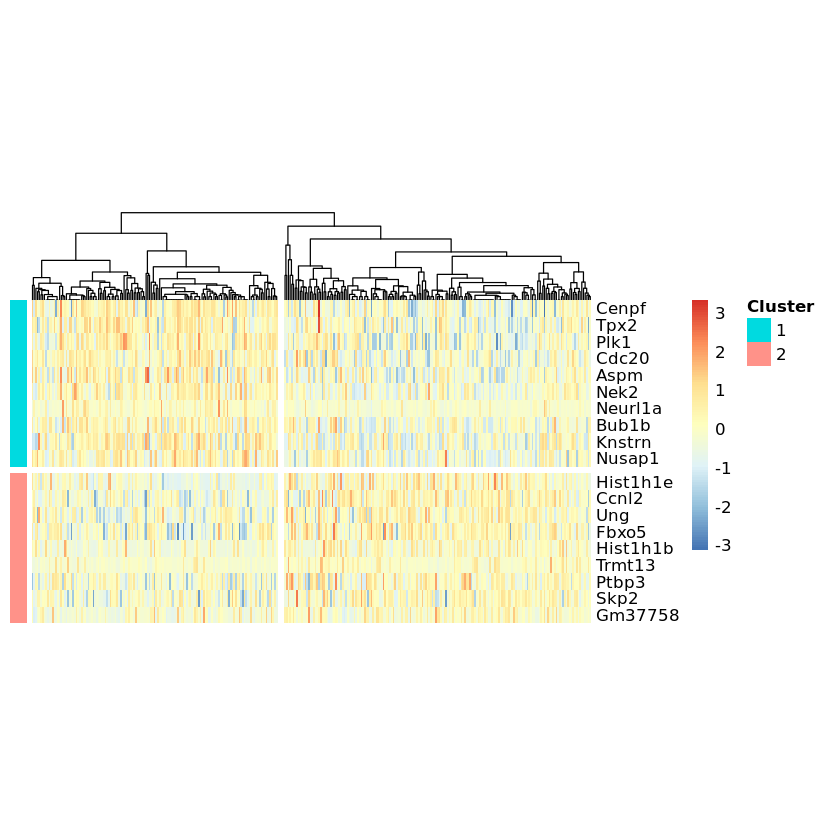

k = 3


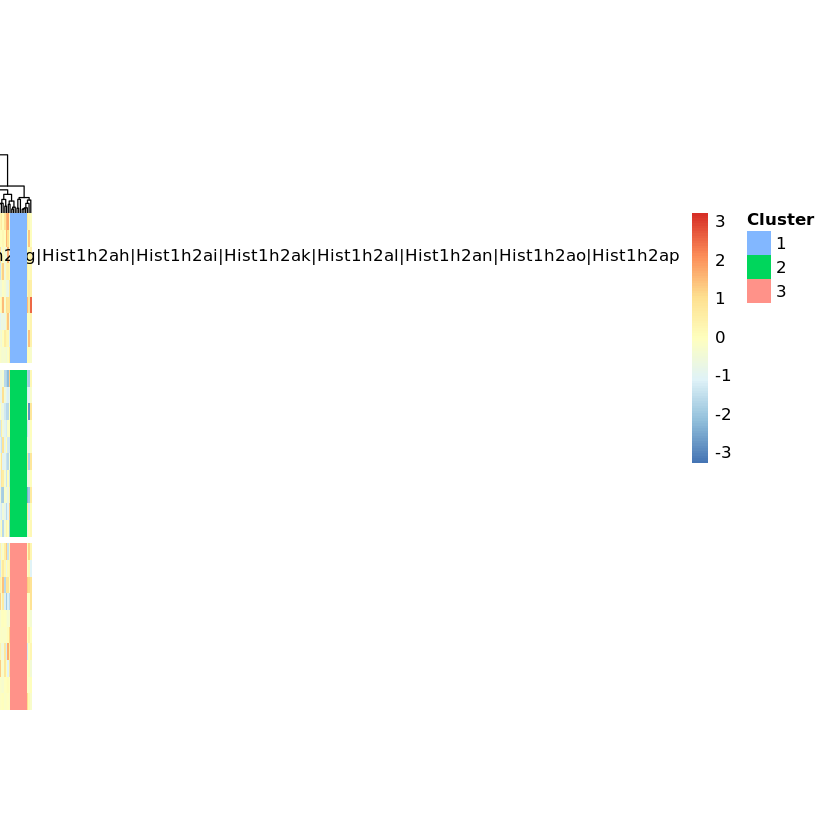

k = 4


k = 5


k = 6


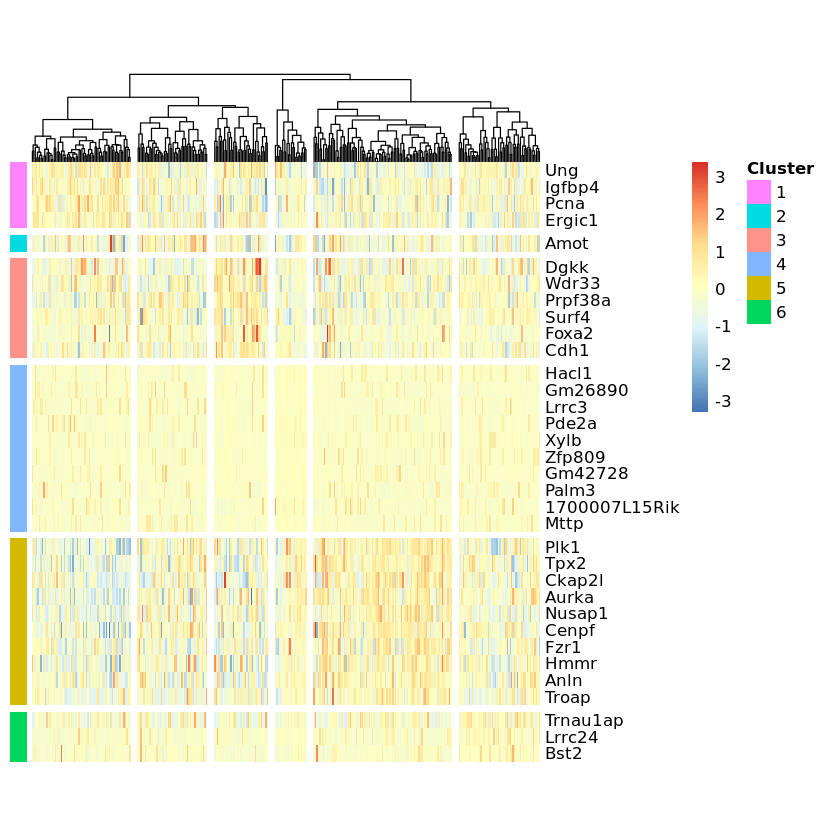

k = 8


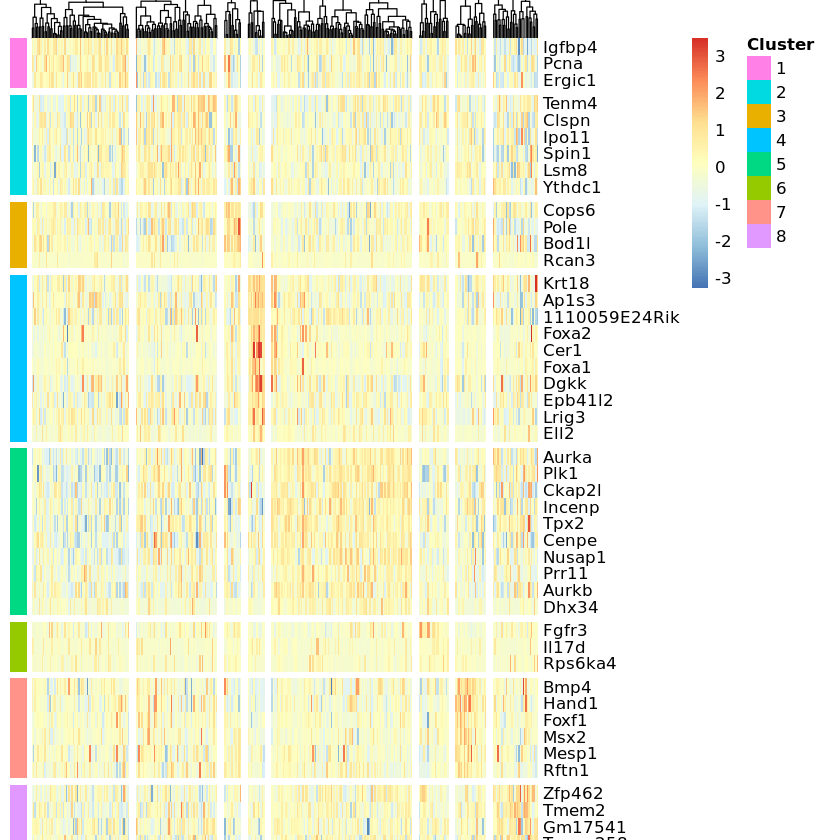

k = 9


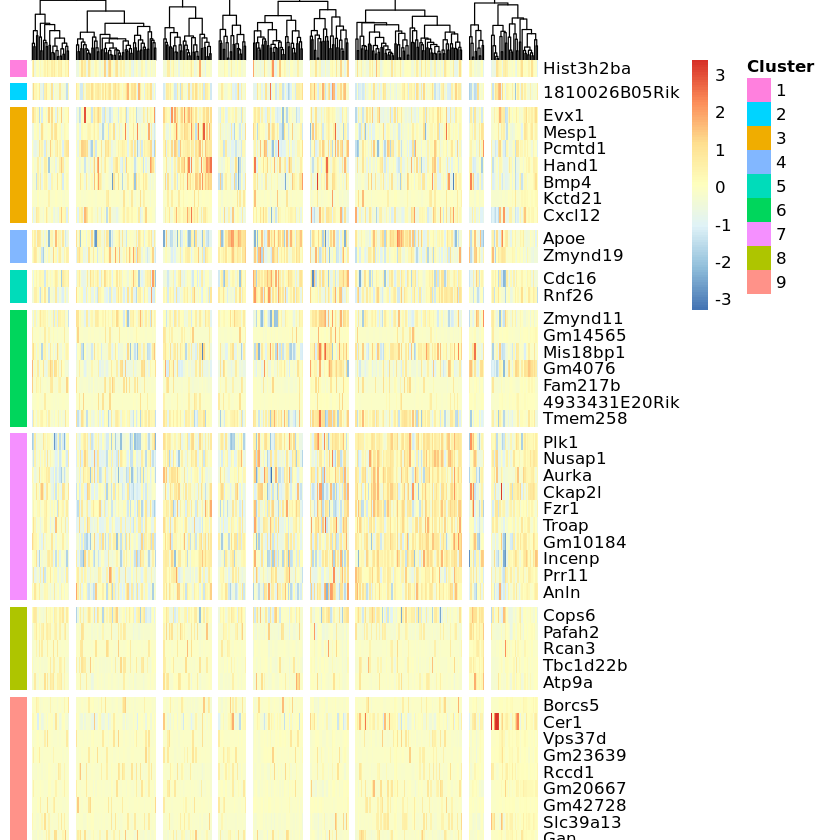

k = 10


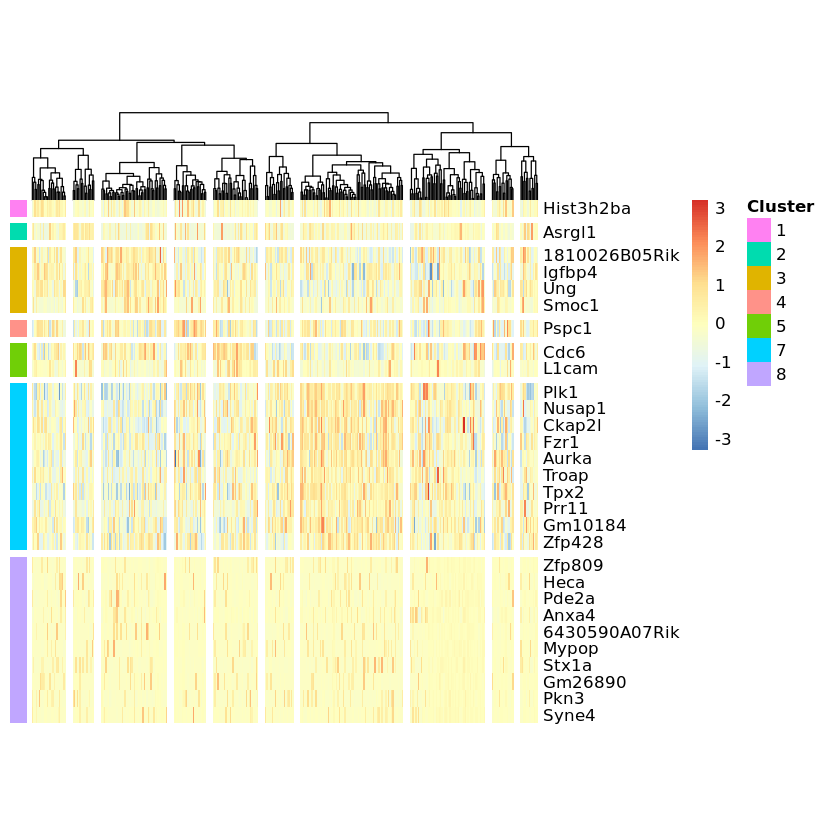

k = 15


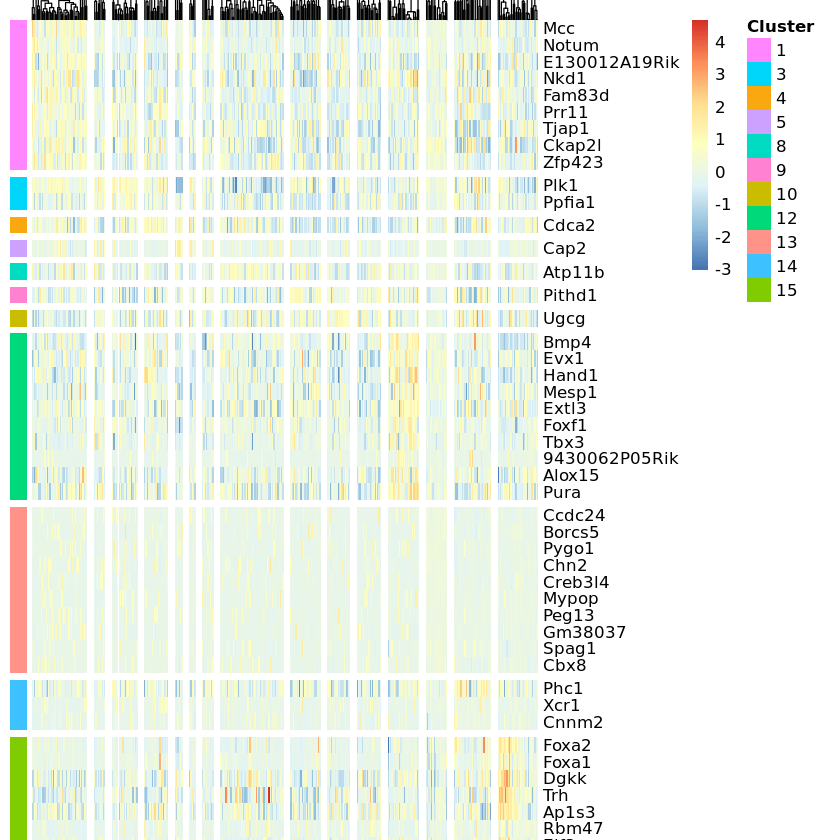

k = 20


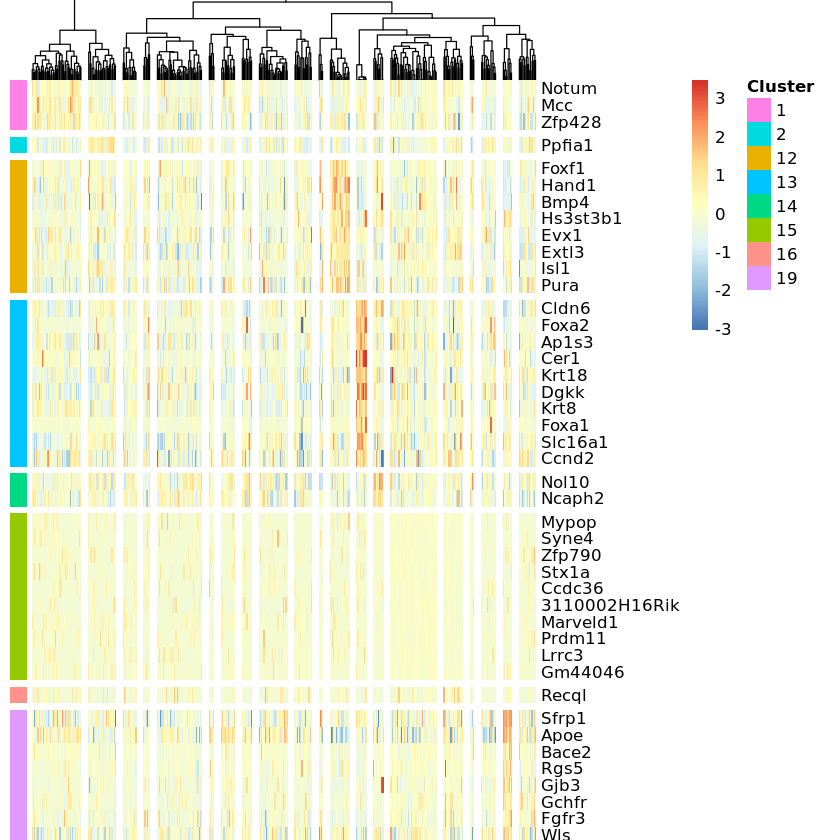

k = 25


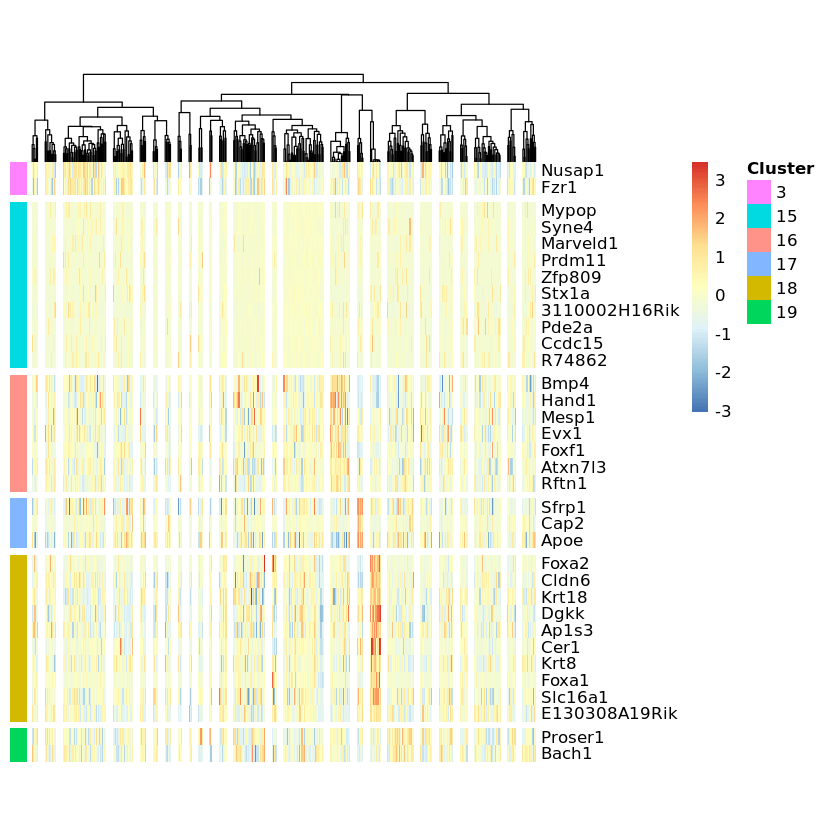

k = 30


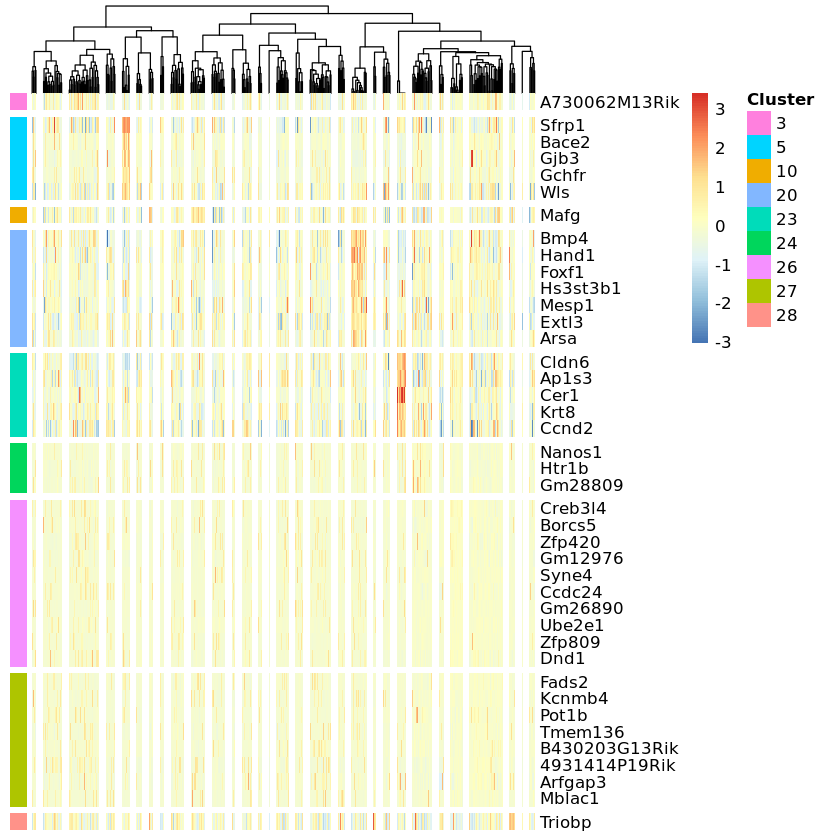

k = 52


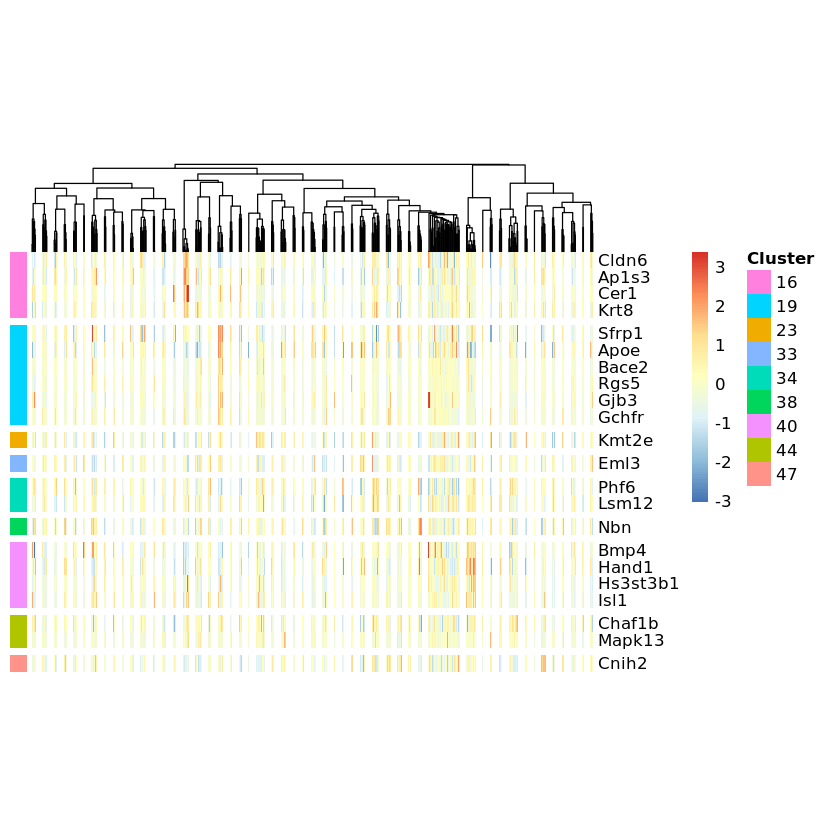

In [22]:
for (i in krange){
    try(
        sc3_plot_markers(sce, i, 0, 1),
        silent = F
    )
    cat(sprintf("k = %.0f\n", i))
}

Plots
k = 2


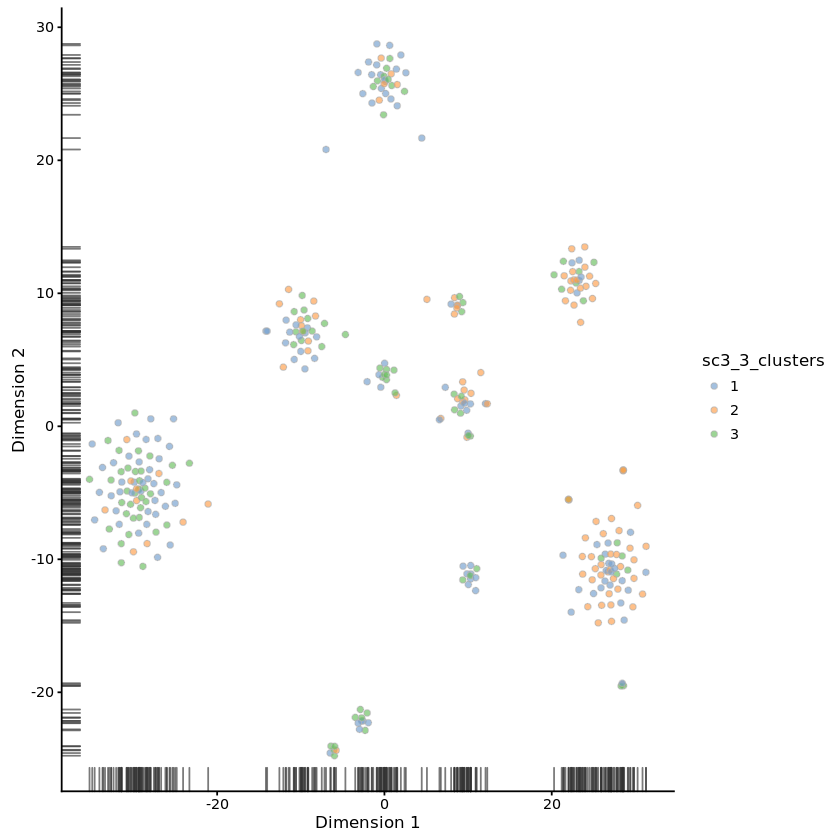

k = 3


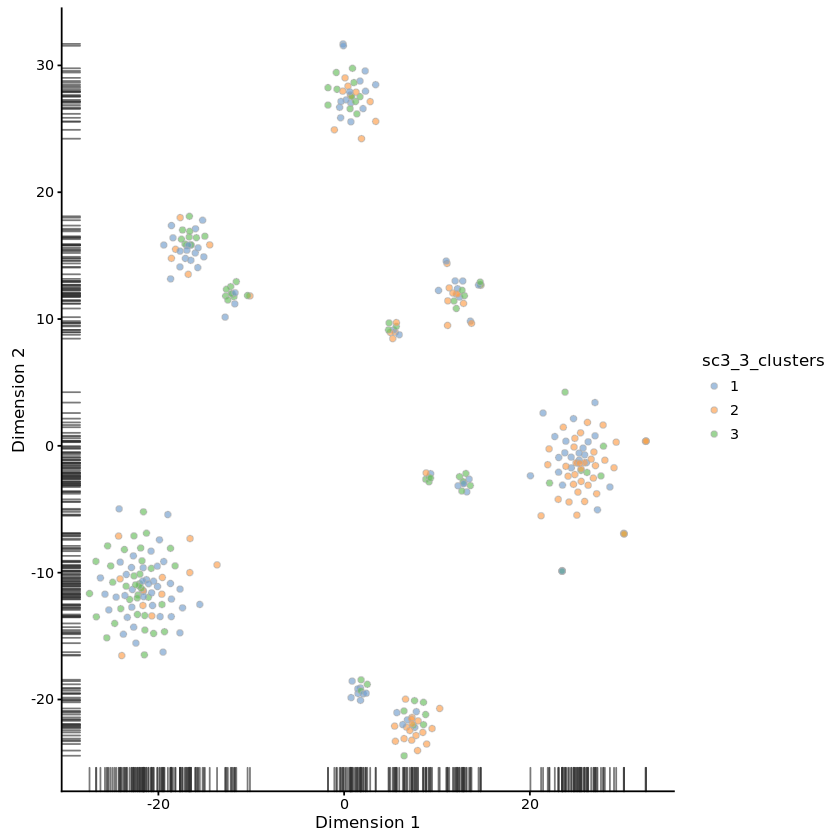

k = 4


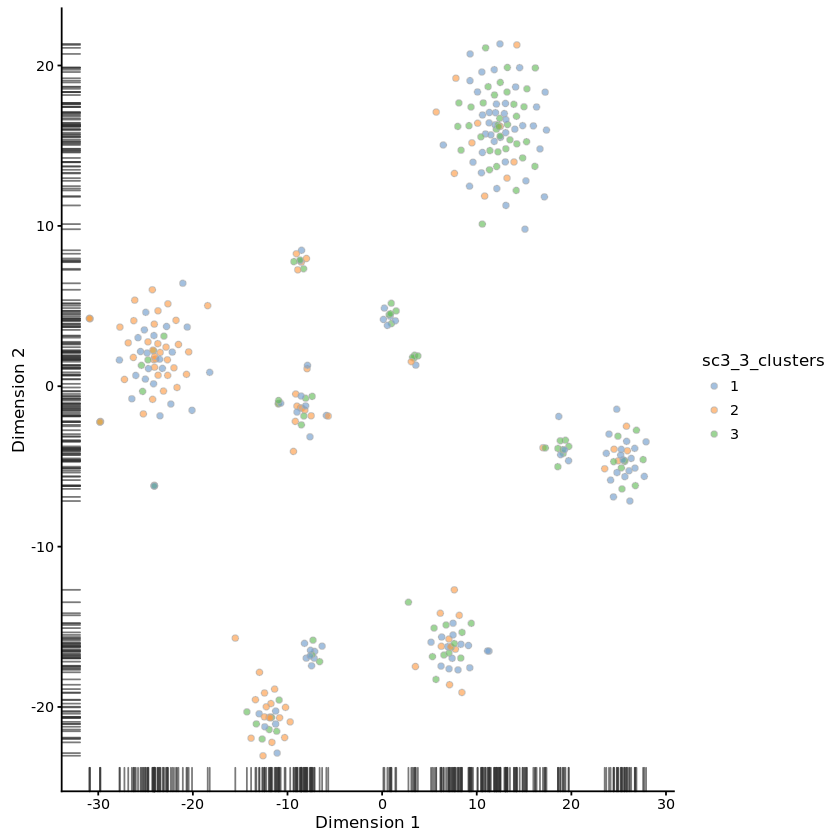

k = 5


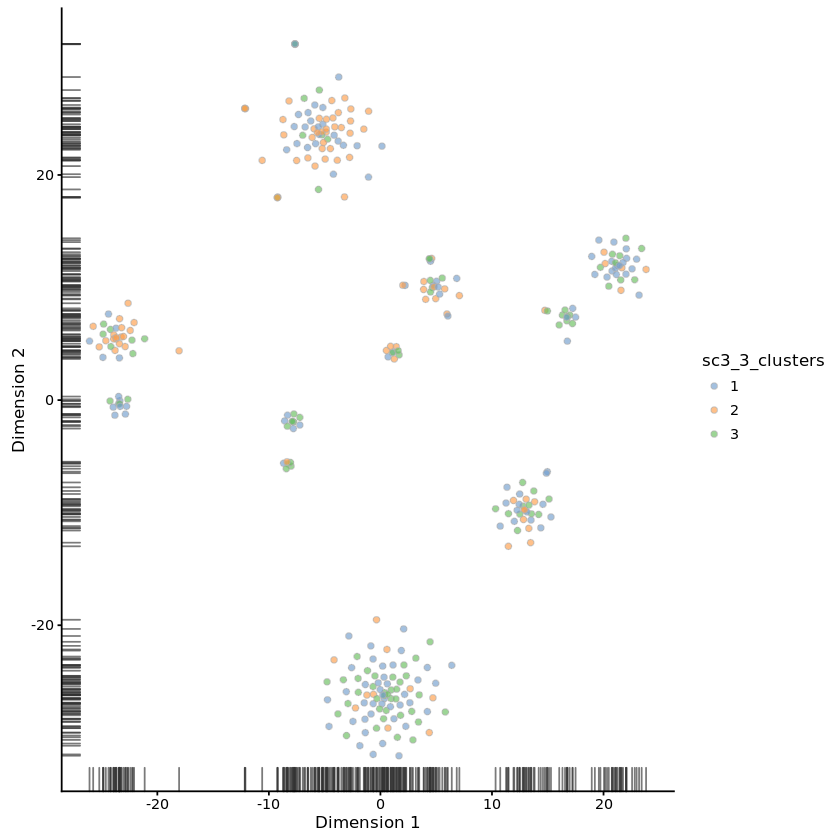

k = 6


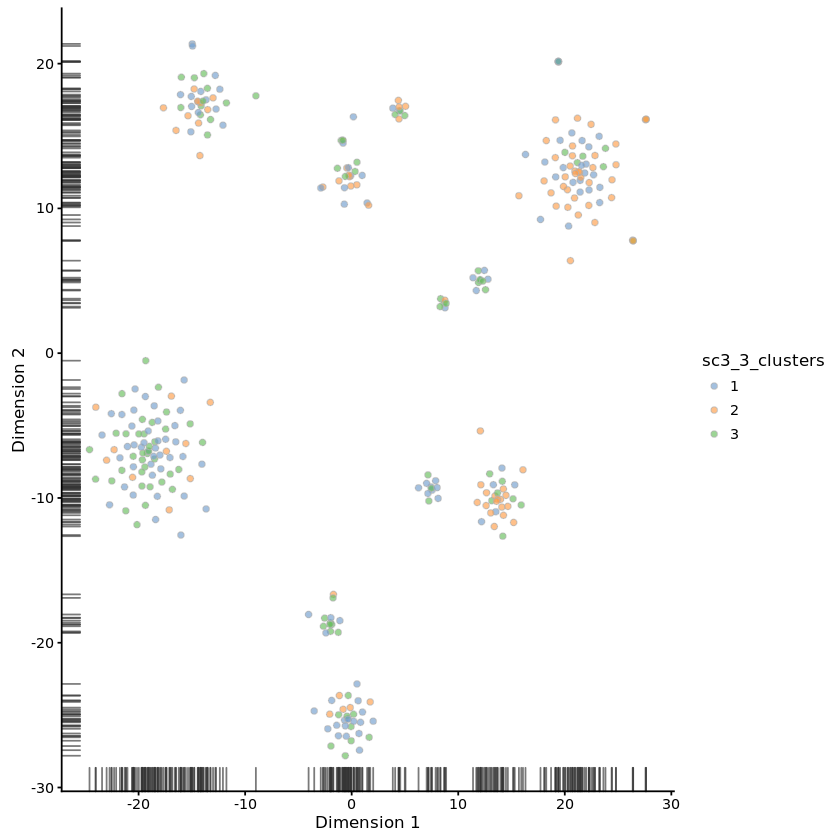

k = 8


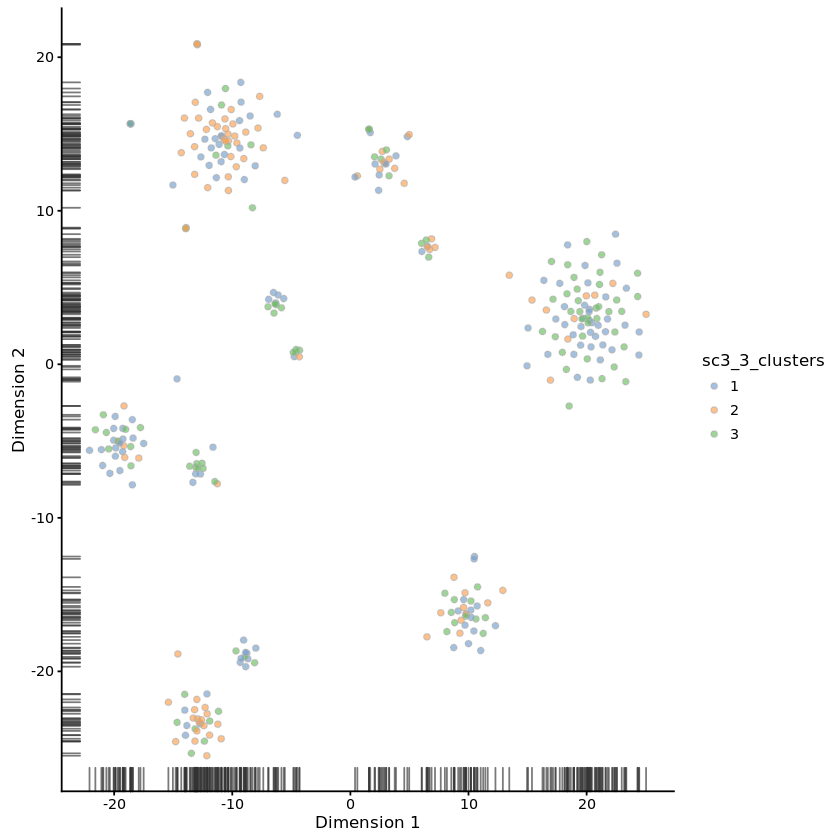

k = 9


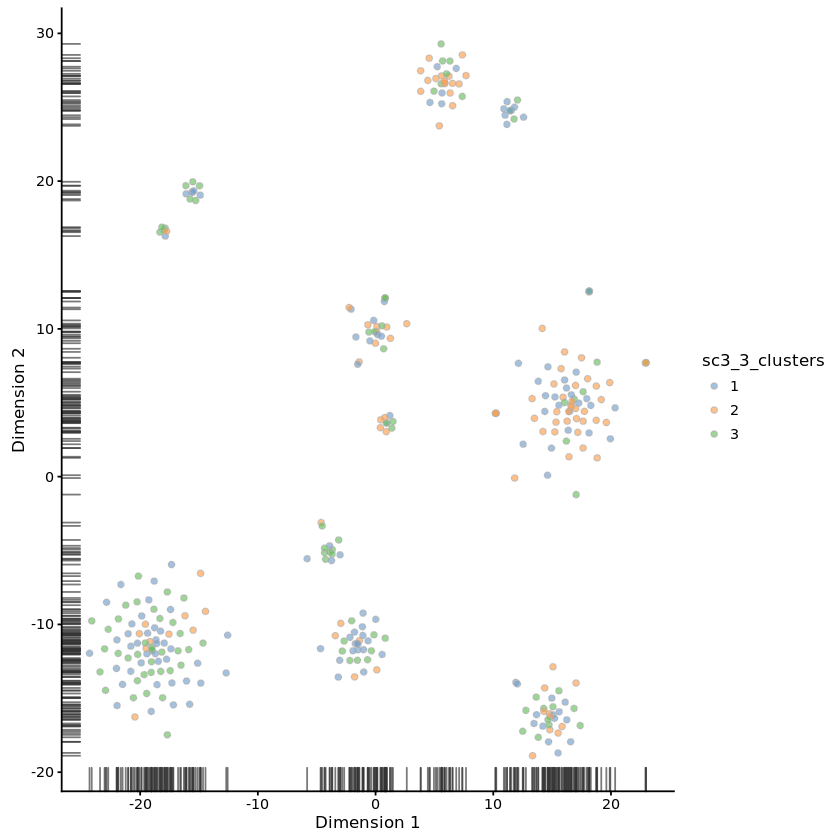

k = 10


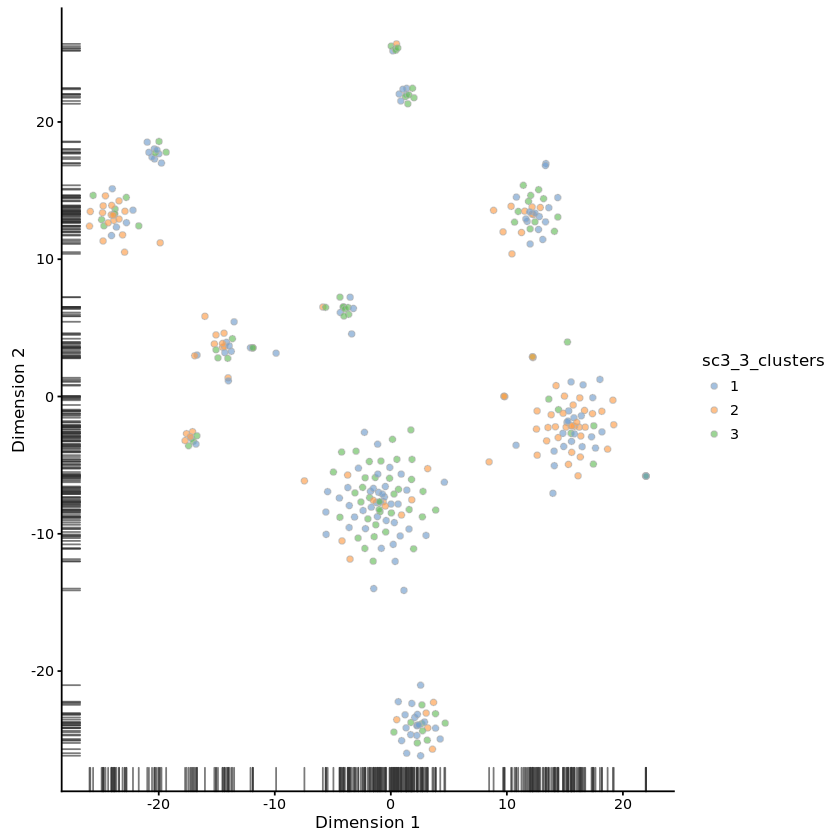

k = 15


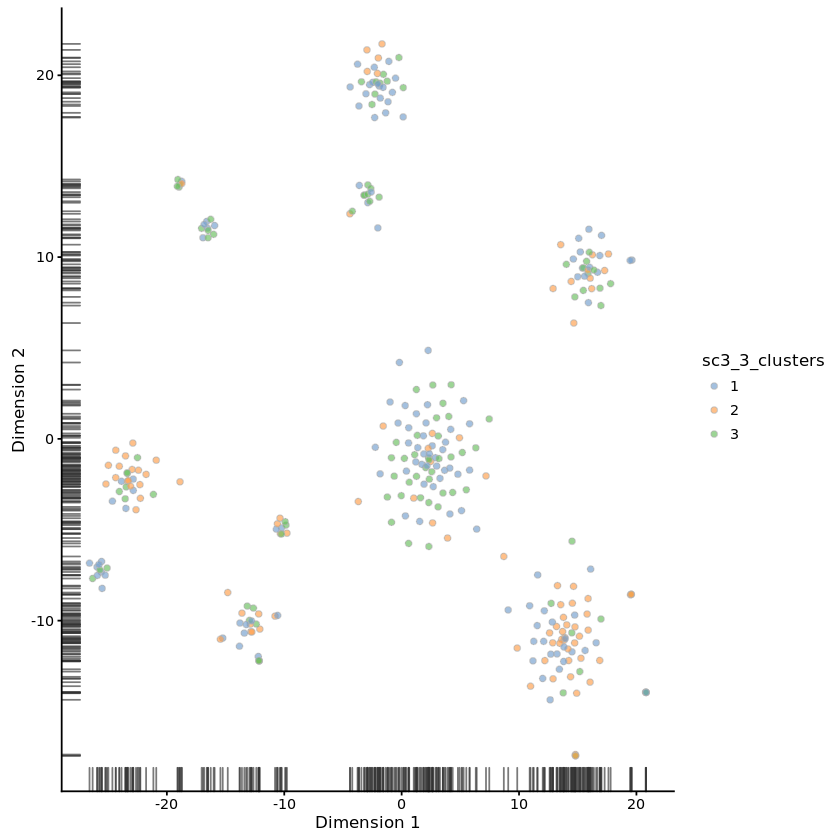

k = 20


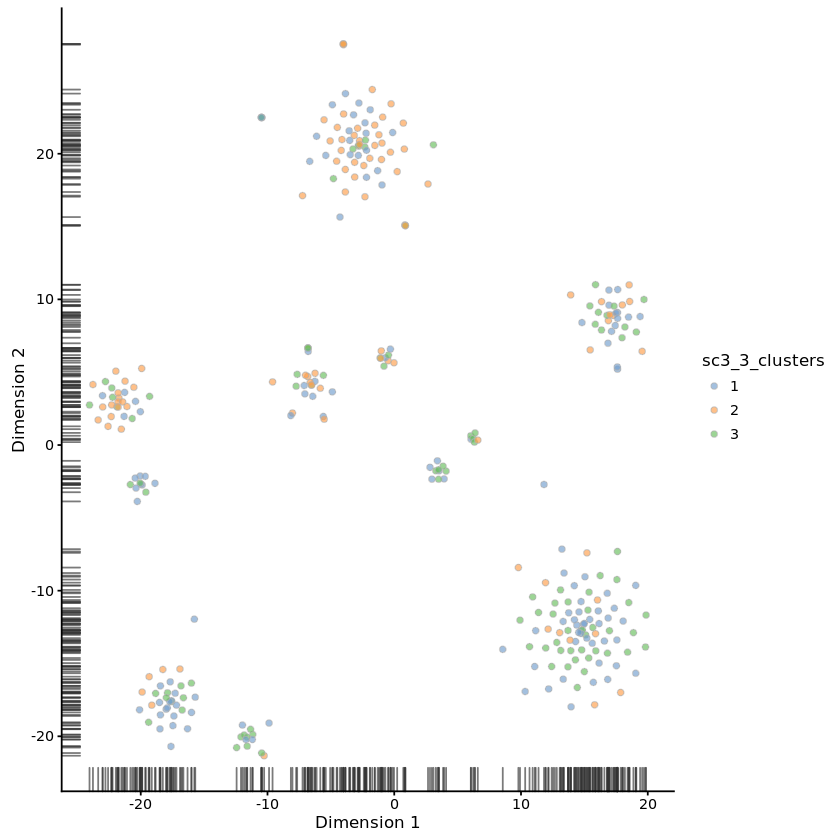

k = 25


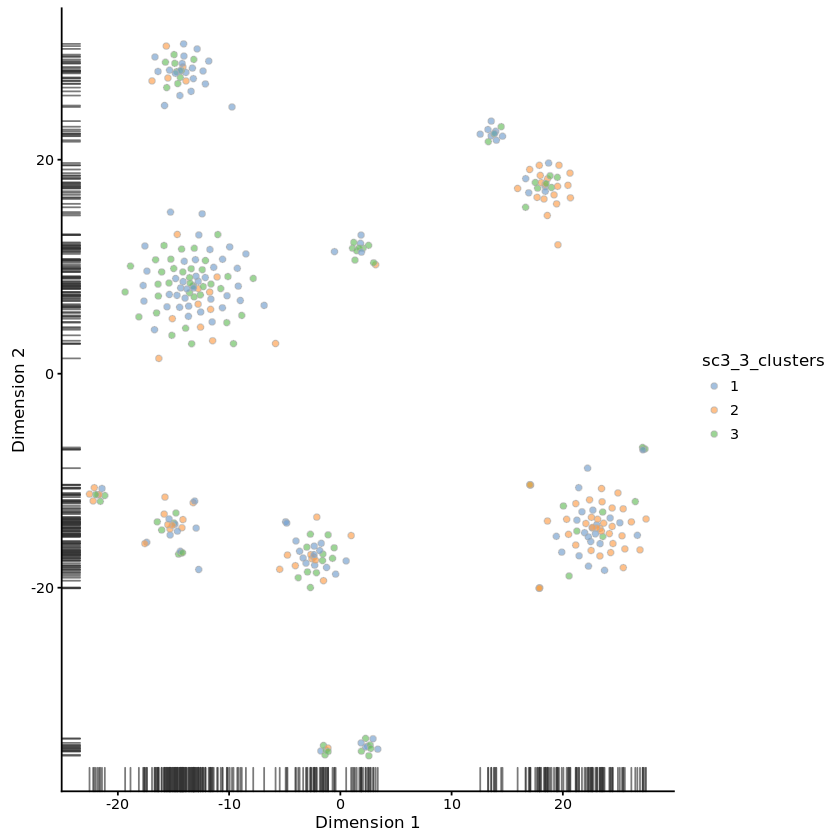

k = 30


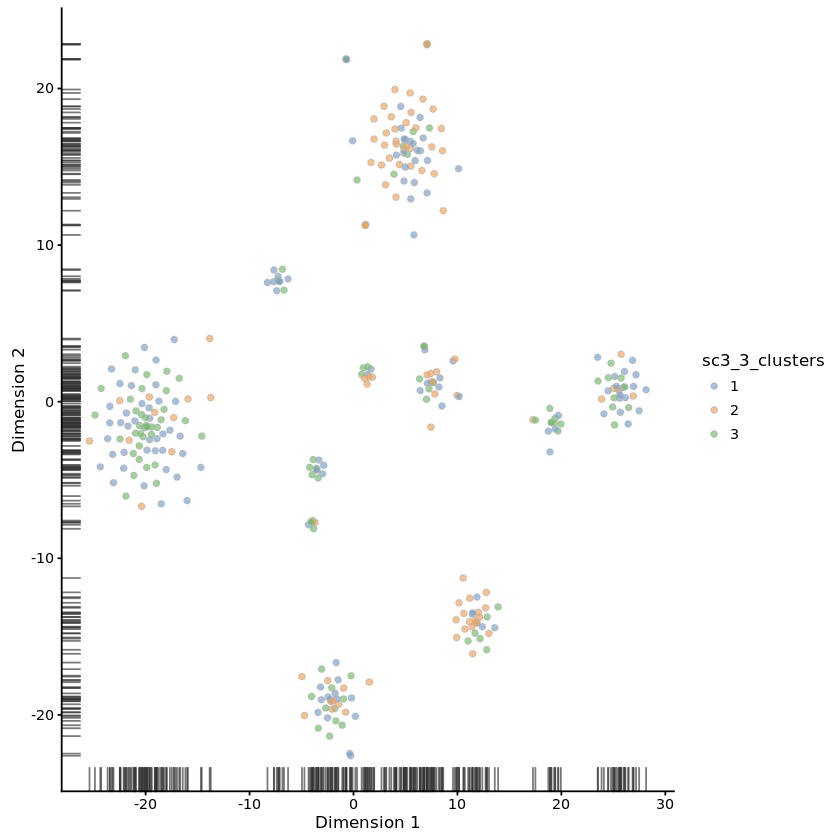

k = 52


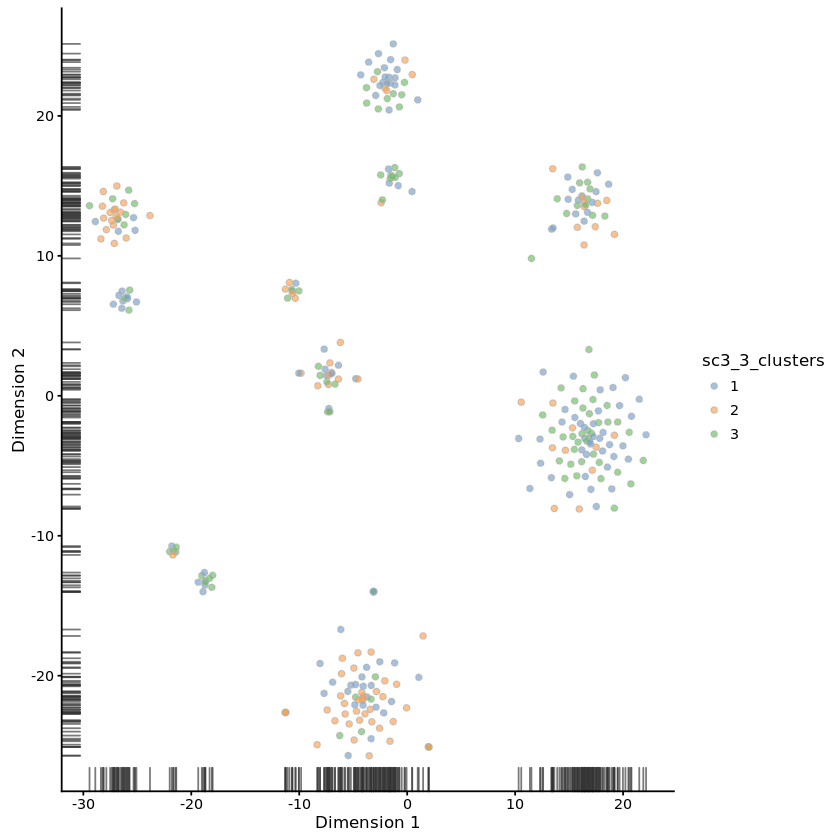

In [24]:
cat("Plots\n")
for (k in krange){   
    print(plotTSNE(
       sce,
       #size_by = "total_features",
       colour_by = sprintf("sc3_%.0f_clusters", 3),
        perplexity = 1
    ))
    cat(sprintf("k = %.0f\n", k))
}


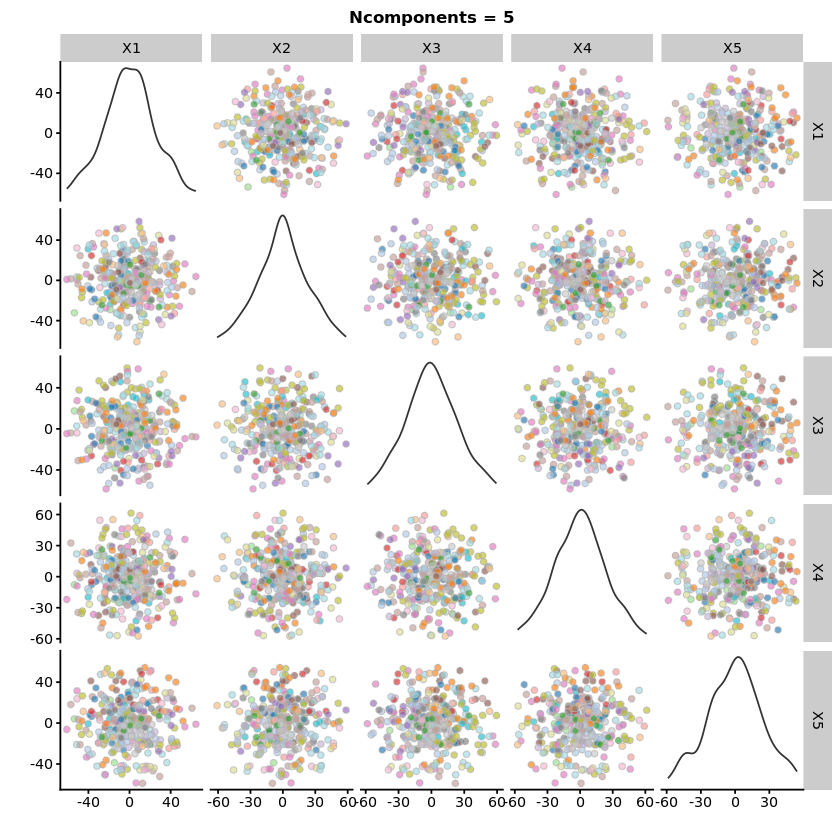

In [88]:
#The problem isn't so much SC3 as it is the fact that the clustering is shite.
# Let's try find some tsne settings that actually work

printInteresting <- function(ntoppers){
    multiplot(plotlist = (
        lapply(ntoppers, function(x){
                      
            return(plotTSNE(
                sce_scran, exprs_values = "logcounts", ncomponents=x,
                colour_by = sprintf("sc3_%.0f_clusters", 20),
            ) + guides(fill=F
            ) + ggtitle(sprintf("Ncomponents = %.0f", x)
            ) + ylab("") 
            )
        })
    ), layout = rbind(c(1,2),c(3,4) ) #,c(5,6),c(7,8))
    )
    cat(sprintf("\n\n\n\nk = %.0f\n", x))
}

#printInteresting(c(2,3,4,5))


plotTSNE(
    sce_scran, exprs_values = "logcounts", ncomponents=5,
    colour_by = sprintf("sc3_%.0f_clusters", 20),
) + guides(fill=F) + ggtitle(sprintf("Ncomponents = %.0f", 5)) + ylab("")


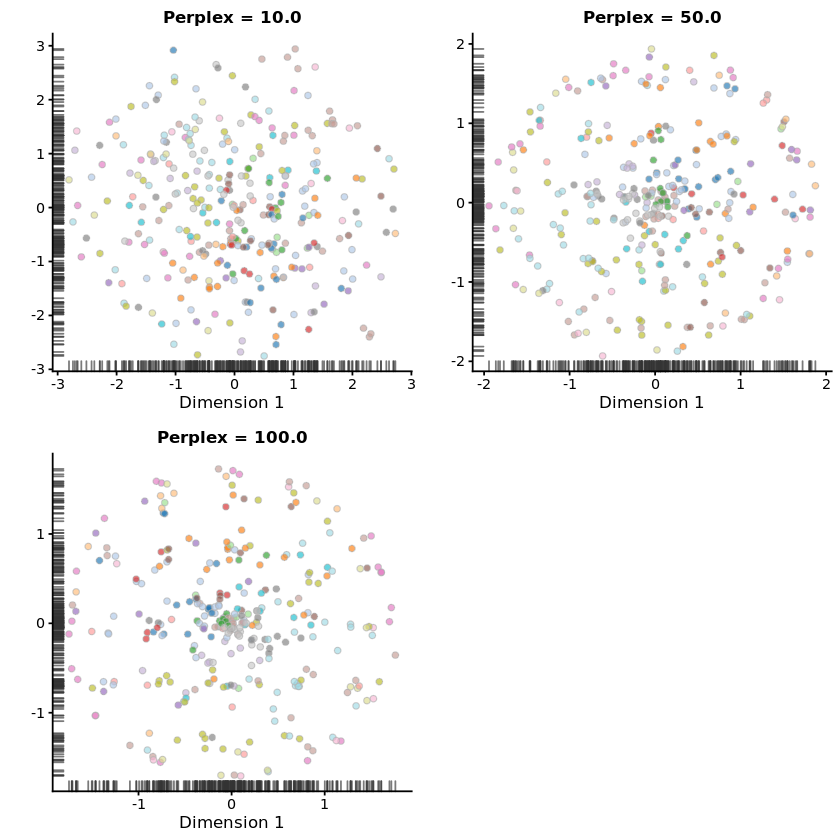

In [94]:
# Altering ncomponents had no effect. Let's try  changing the perplexity
printInteresting <- function(ntoppers){
    multiplot(plotlist = (
        lapply(ntoppers, function(x){
                      
            return(plotTSNE(
                sce_scran, exprs_values = "logcounts", perplexity=x,
                colour_by = sprintf("sc3_%.0f_clusters", 20),
            ) + guides(fill=F
            ) + ggtitle(sprintf("Perplex = %.1f", x)
            ) + ylab("") 
            )
        })
    ), layout = rbind(c(1,2),c(3,4) ) #,c(5,6),c(7,8))
    )
}

printInteresting(c(10,50,100))


Perplexity should be lower than K!
Perplexity should be lower than K!
Perplexity should be lower than K!


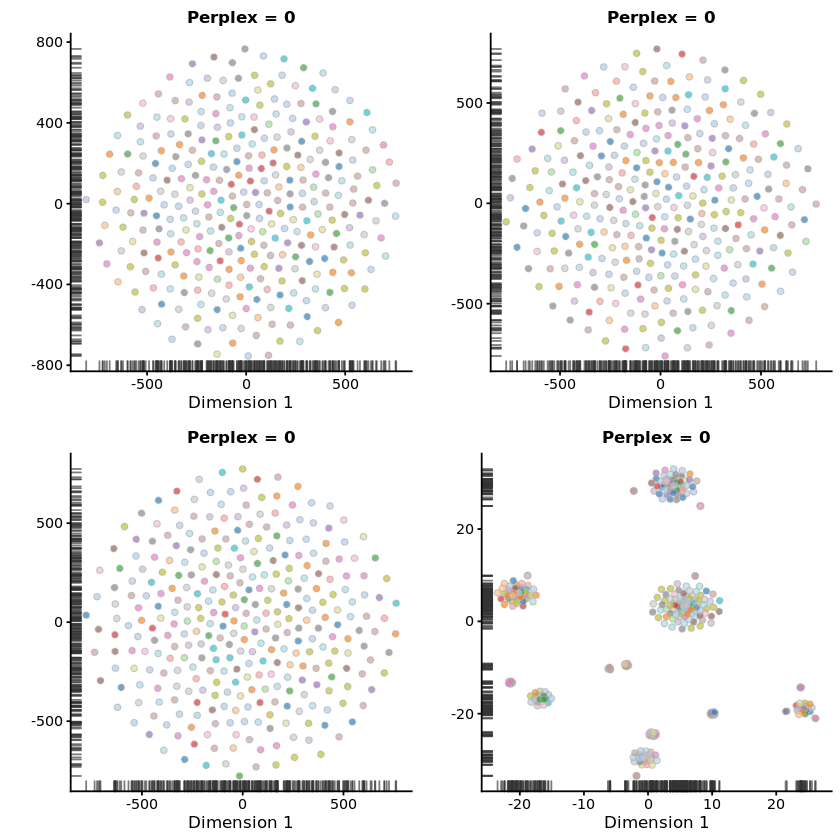

In [92]:
printInteresting(c(1,2,3,5))
printInteresting(c(0.1,0.2,0.3,0.5))

In [95]:
printInteresting(c(0.5,0.6,0.7,0.8))
printInteresting(c(0.9,1,1.1,1.2))

In [97]:
# Perplexity appears to be integer and clustering seems best when it is very very low == 1.
# Let us try changing the rannd_seed and seing what happens.
assays(sce_scran)

List of length 3
names(3): counts logcounts combat